Первые 5 строк данных:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Названия столбцов:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Оценка моделей при различном количестве строк:

Строк: 100
MSE: 8.3573
MAE: 2.0567
R2: 0.7456

Строк: 300
MSE: 9.1555
MAE: 2.3522
R2: 0.8578

Строк: 506
MSE: 24.2911
MAE: 3.1891
R2: 0.6688

Оценка моделей пр

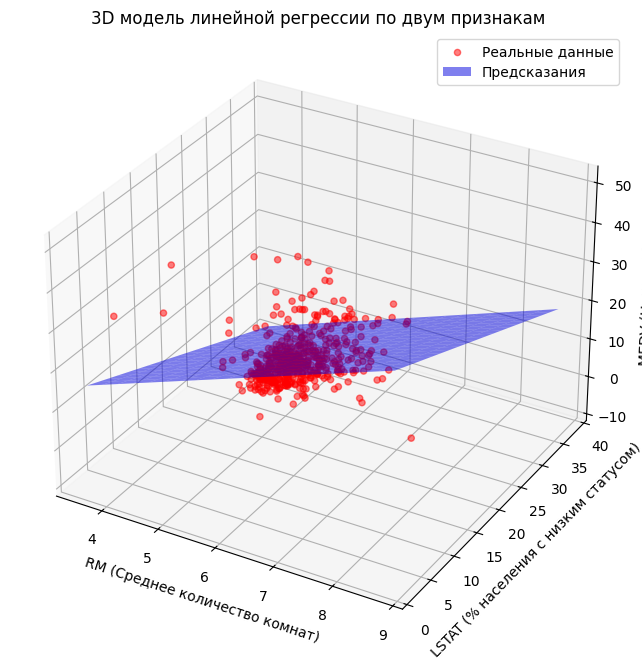

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Указываем названия столбцов вручную (так как в файле их нет)
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

df = pd.read_csv('housing.csv', header=None, names=column_names, sep=r'\s+')

# Проверка данных
print("Первые 5 строк данных:")
print(df.head())
print("\nНазвания столбцов:")
print(df.columns.tolist())

# Определяем признаки и целевую переменную
features = df.drop('MEDV', axis=1)
target = df['MEDV']

# Метрика оценки модели
def evaluate_model(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

# 1a. Влияние количества строк (данных)
sample_sizes = [100, 300, len(df)]
results_rows = {}

for size in sample_sizes:
    X_sample = features[:size]
    y_sample = target[:size]
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_rows[size] = evaluate_model(y_test, y_pred)

# Вывод результатов по строкам
print("\nОценка моделей при различном количестве строк:")
for size, metrics in results_rows.items():
    print(f"\nСтрок: {size}")
    for name, val in metrics.items():
        print(f"{name}: {val:.4f}")

# 1b. Влияние количества признаков
feature_sets = {
    '2 признака': ['RM', 'LSTAT'],
    '7 признаков': ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'AGE', 'DIS'],
    'Все признаки': features.columns.tolist()
}

results_cols = {}

for name, cols in feature_sets.items():
    X_subset = df[cols]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, target, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results_cols[name] = evaluate_model(y_test, y_pred)

# Вывод результатов по признакам
print("\nОценка моделей при различном количестве признаков:")
for name, metrics in results_cols.items():
    print(f"\n{name}")
    for metric_name, val in metrics.items():
        print(f"{metric_name}: {val:.4f}")

# 2. 3D график для 2 признаков
X_2d = df[['RM', 'LSTAT']]
y = df['MEDV']
model_2d = LinearRegression()
model_2d.fit(X_2d, y)

# Предсказания по сетке (используем DataFrame с названиями признаков)
rm_range = np.linspace(X_2d['RM'].min(), X_2d['RM'].max(), 20)
lstat_range = np.linspace(X_2d['LSTAT'].min(), X_2d['LSTAT'].max(), 20)
RM_grid, LSTAT_grid = np.meshgrid(rm_range, lstat_range)
X_pred = pd.DataFrame(np.c_[RM_grid.ravel(), LSTAT_grid.ravel()], columns=['RM', 'LSTAT'])
Z = model_2d.predict(X_pred)
Z = Z.reshape(RM_grid.shape)

# 3D визуализация
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2d['RM'], X_2d['LSTAT'], y, c='r', marker='o', alpha=0.5, label='Реальные данные')
ax.plot_surface(RM_grid, LSTAT_grid, Z, alpha=0.5, color='blue', label='Предсказания')
ax.set_xlabel('RM (Среднее количество комнат)')
ax.set_ylabel('LSTAT (% населения с низким статусом)')
ax.set_zlabel('MEDV (Цена в $1000)')
plt.title('3D модель линейной регрессии по двум признакам')
plt.legend()
plt.show()